In [ ]:
! pip install selenium beautifulsoup4 pandas numpy requests lxml openpyxl

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
import time

options = Options()
options.add_argument("--start-maximized")

service = Service()
driver = webdriver.Chrome(service=service, options=options)


In [ ]:
url = "https://www.nabis.go.kr/termsDetailView.do?menucd=189&gbnCode=S51&eventNo=371"
driver.get(url)
time.sleep(3)  


In [ ]:
# RE100 국대 기업 웹 크롤링

from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time


driver = webdriver.Chrome()

base_url = "https://k-re100.or.kr/bbs/board.php?bo_table=sub2_2_1&page={}"
all_data = []

for page in range(1, 4):
    driver.get(base_url.format(page))
    time.sleep(5)

    rows = driver.find_elements(By.CSS_SELECTOR, "#fboardlist > div.bo_list ul li")

    for row in rows:
        try:
            no = row.find_element(By.CSS_SELECTOR, "span.s-number").text.strip()
            company = row.find_element(By.CSS_SELECTOR, "span.s-name a").text.strip()
            business = row.find_element(By.CSS_SELECTOR, "span.wr_1 a").text.strip()
            target = row.find_element(By.CSS_SELECTOR, "span.wr_2").text.strip()
            join_year = row.find_element(By.CSS_SELECTOR, "span.wr_3").text.strip()

            if company:
                all_data.append({
                    "No": no,
                    "기업명": company,
                    "사업영역": business,
                    "RE100 목표/달성률": target,
                    "가입연도": join_year
                })
        except:
            continue

driver.quit()

df = pd.DataFrame(all_data)
print(df)

# df.to_csv("01_DataAnalysis/data/policy/k_re100_companies_all.csv", index=False, encoding="utf-8-sig")

    No         기업명                             사업영역 RE100 목표/달성률  가입연도
0   21       LG이노텍  광학솔루션, 기판소재, 전장부품, 전자부품의 4개 사업…   2030 (61%)  2022
1   20          KT  유무선통신, 초고속인터넷, IPTV, ICT, 금융사업…    2050 (1%)  2022
2   19          기아  완성차(승용차, 상용차, 전기차, 하이브리드차 등) 제…    2040 (9%)  2022
3   18       현대자동차  완성차 (승용차, 상용차, 전기차, 수소차, 하이브리드…   2045 (13%)  2022
4   17        현대위아  자동차 부품(엔진, 열관리 모듈, 등속조인트 등) 제조…    2045 (1%)  2022
5   16       현대모비스  자동차 부품(자율주행, IVI, 전동화, 제동, 조향,…    2040 (9%)  2022
6   15    인천국제공항공사  인천국제공항의 건설 및 관리/운영, 주변지역개발, 부대…   2040 (24%)  2022
7   14      롯데칠성음료        탄삼음료, 주스, 커피, 차, 생수, 주류 등    2040 (7%)  2021
8   13  SK아이이테크놀로지                         2차전지 분리막   2030 (57%)  2021
9   12      미래에셋증권                              증권사   2025 (14%)  2021
10  11        고려아연  아연, 연, 금, 은, 동, 인듐 및 희소금속 등 총 …    2050 (0%)  2021
11  10      KB금융그룹                 종합금융그룹2040년2021년    2040 (1%)  2021
12   9     한국수자원공사             수자원 개발 및 관리, 생활용수 공급   2050 (84%)  2021
13   8

In [9]:
import os

# 현재 작업 디렉토리 확인
print(os.getcwd())

print(os.listdir("scripts"))

c:\Users\dkreh\Desktop\KDT_RE_5th\3_Project\01_DataAnalysis\scripts\crawling


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'scripts'

In [12]:
# RE100 해외 사레 분석
import pandas as pd
df = pd.read_csv("../preprocessing/RE100_국가별_비교_확장.csv", encoding="utf-8-sig")
df

,국가,재생에너지 사용률(%)
0,유럽(EU 단일시장),83
1,중국,59
2,미국,60
3,브라질,70
4,인도,39
5,베트남,58
6,일본,36
7,아르헨티나,33
8,인도네시아,33
9,호주,50


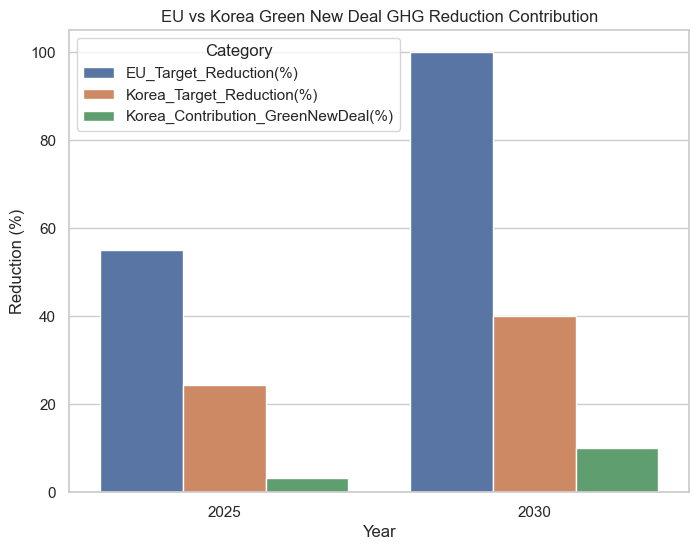

In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 크롤링 (예시: 한국형 그린뉴딜 보고서 페이지)
url = "https://www.keei.re.kr/board.es?mid=a20102000000&bid=0028&act=view&list_no=119352&cg_code=C01"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# 2. (예시) 텍스트에서 온실가스 감축 수치 추출
# 실제로는 보고서 내 표 데이터를 파싱해야 함
data = {
    "Year": [2025, 2030],
    "EU_Target_Reduction(%)": [55, 100],   # EU 목표 (1990 대비)
    "Korea_Target_Reduction(%)": [24.4, 40], # 한국 목표 (2017/2018 대비)
    "Korea_Contribution_GreenNewDeal(%)": [3.3, 10] # 실제 기여율 (보고서 분석)
}
df = pd.DataFrame(data)

# 3. 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x="Year", y="value", hue="variable",
            data=pd.melt(df, ["Year"], var_name="variable", value_name="value"))

plt.title("EU vs Korea Green New Deal GHG Reduction Contribution")
plt.ylabel("Reduction (%)")
plt.xlabel("Year")
plt.legend(title="Category")
plt.show()
